# Final Task Rakamin X ID/X Partners : End To End Credit Risk Modeling

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import shutil

## Import Dataset

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
drive_folder_path = '/content/drive/MyDrive/Loan Dataset'

colab_folder_path = '/content/Loan Dataset'

shutil.copytree(drive_folder_path, colab_folder_path)

'/content/Loan Dataset'

In [4]:
file_path = '/content/Loan Dataset/loan_data_2007_2014.csv'

df = pd.read_csv(file_path)

<ipython-input-4-7a54a8ed9859>:3: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


## Data Understanding

In [5]:
pd.set_option('display.max_columns', None)

df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,215934.000000,62638.000000,466256.000000,466256.000000,4.662850e+05,465945.000000,466256.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466140.000000,98974.000000,466285.0,0.0,0.0,0.0,466256.000000,3.960090e+05,3.960090e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,0.804745,34.104430,74.306012,11.187069,0.160564,1.623020e+04,56.176947,25.064430,4410.062342,4408.452258,11540.686220,11469.892747,8866.014657,2588.677225,0.650129,85.344211,8.961534,3123.913796,0.009085,42.852547,1.0,NaN,NaN,NaN,0.004002,1.919135e+02,1.388017e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,1.091598,21.778487,30.357653,4.987526,0.510863,2.067625e+04,23.732628,11.600141,6355.078769,6353.198001,8265.627112,8254.157579,7031.687997,2483.809661,5.265730,552.216084,85.491437,5554.737393,0.108648,21.662591,0.0,NaN,NaN,NaN,0.068637,1.463021e+04,1.521147e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,0.000000,16.000000,53.000000,8.000000,0.000000,6.413000e+03,39.200000,17.000000,0.000000,0.000000,5552.125349,5499.250000,3708.560000,957.280000,0.000000,0.000000,0.000000,312.620000,0.000000,26.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.861800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,0.000000,31.000000,76.000000,10.000000,0.000000,1.176400e+04,57.600000,23.000000,441.470000,441.380000,9419.250943,9355.430000,6817.760000,1818.880000,0.000000,0.000000,0.000000,545.960000,0.000000,42.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,8.153900e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,1.000000,49.000000,102.000000,14.000000,0.000000,2.033300e+04,74.700000,32.000000,7341.650000,7338.390000,15308.158460,15231.310000,12000.000000,3304.530000,0.000000,0.000000,0.000000,3187.510000,0.000000,59.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.089530e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [8]:
print(f'jumlah data duplikat : {df.duplicated().sum()}')

jumlah data duplikat : 0


## Data Preprocessing

Menghapus kolom yang tidak berpengaruh untuk training model dan tidak relevan untuk inferensi model dalam menentukan output klasifikasi

In [9]:
df.drop(columns=['Unnamed: 0', 'id', 'member_id', 'sub_grade', 'issue_d', 'pymnt_plan', 'emp_title', 'url', 'desc', 'title', 'zip_code', 'addr_state', 'policy_code', 'application_type', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d','last_credit_pull_d', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee'], inplace=True)

In [10]:
df.isnull().sum()

loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
emp_length                      21008
home_ownership                      0
annual_inc                          4
verification_status                 0
loan_status                         0
purpose                             0
dti                                 0
delinq_2yrs                        29
earliest_cr_line                   29
inq_last_6mths                     29
mths_since_last_delinq         250351
mths_since_last_record         403647
open_acc                           29
pub_rec                            29
revol_bal                           0
revol_util                        340
total_acc                          29
initial_list_status                 0
out_prncp                           0
out_prncp_in

Cek missing value yang lebih dari 50% dari total keseluruhan

In [11]:
emp_col = df.isna().mean()
emp_col[emp_col > 0.5]

mths_since_last_delinq         0.536906
mths_since_last_record         0.865666
mths_since_last_major_derog    0.787739
annual_inc_joint               1.000000
dti_joint                      1.000000
verification_status_joint      1.000000
open_acc_6m                    1.000000
open_il_6m                     1.000000
open_il_12m                    1.000000
open_il_24m                    1.000000
mths_since_rcnt_il             1.000000
total_bal_il                   1.000000
il_util                        1.000000
open_rv_12m                    1.000000
open_rv_24m                    1.000000
max_bal_bc                     1.000000
all_util                       1.000000
inq_fi                         1.000000
total_cu_tl                    1.000000
inq_last_12m                   1.000000
dtype: float64

Menghapus kolom yang memiliki missing value lebih dari 50%

In [12]:
drop_columns = ['mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl',
       'inq_last_12m']

df.drop(columns=drop_columns, inplace=True)

In [13]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,27.65,0.0,Jan-85,1.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,2500,2500,2500.0,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,1.00,0.0,Apr-99,5.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,2400,2400,2400.0,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,8.72,0.0,Nov-01,2.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3,10000,10000,10000.0,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,20.00,0.0,Feb-96,1.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,3000,3000,3000.0,60 months,12.69,67.79,B,1 year,RENT,80000.0,Source Verified,Current,other,17.94,0.0,Jan-96,0.0,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,0.0,0.0,NaN,NaN,NaN


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466285 non-null  int64  
 1   funded_amnt                 466285 non-null  int64  
 2   funded_amnt_inv             466285 non-null  float64
 3   term                        466285 non-null  object 
 4   int_rate                    466285 non-null  float64
 5   installment                 466285 non-null  float64
 6   grade                       466285 non-null  object 
 7   emp_length                  445277 non-null  object 
 8   home_ownership              466285 non-null  object 
 9   annual_inc                  466281 non-null  float64
 10  verification_status         466285 non-null  object 
 11  loan_status                 466285 non-null  object 
 12  purpose                     466285 non-null  object 
 13  dti           

In [15]:
print(df['loan_status'].value_counts())

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64


Membuat kolom baru bernama loan_category yang berisi kategori peminjam yang baik dan buruk berdasarkan loan_status

In [16]:
good_loan = ['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid', 'Current', 'In Grace Period']

df['loan_category'] = np.where(df['loan_status'].isin(good_loan), 1, 0)

In [17]:
df[['loan_status', 'loan_category']].head()

,loan_status,loan_category
0,Fully Paid,1
1,Charged Off,0
2,Fully Paid,1
3,Fully Paid,1
4,Current,1


Menghapus kolom loan_status karna sudah diganti oleh loan_category

In [18]:
df.drop(columns=['loan_status'], inplace=True)

Menghapus kata months pada kolom term dan mengubah tipe datanya

In [19]:
df['term'] = df['term'].str.replace('months', '').astype(int)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466285 non-null  int64  
 1   funded_amnt                 466285 non-null  int64  
 2   funded_amnt_inv             466285 non-null  float64
 3   term                        466285 non-null  int64  
 4   int_rate                    466285 non-null  float64
 5   installment                 466285 non-null  float64
 6   grade                       466285 non-null  object 
 7   emp_length                  445277 non-null  object 
 8   home_ownership              466285 non-null  object 
 9   annual_inc                  466281 non-null  float64
 10  verification_status         466285 non-null  object 
 11  purpose                     466285 non-null  object 
 12  dti                         466285 non-null  float64
 13  delinq_2yrs   

In [21]:
df.isna().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
emp_length                    21008
home_ownership                    0
annual_inc                        4
verification_status               0
purpose                           0
dti                               0
delinq_2yrs                      29
earliest_cr_line                 29
inq_last_6mths                   29
open_acc                         29
pub_rec                          29
revol_bal                         0
revol_util                      340
total_acc                        29
initial_list_status               0
out_prncp                         0
out_prncp_inv                     0
collections_12_mths_ex_med      145
acc_now_delinq                   29
tot_coll_amt                  70276
tot_cur_bal                 

Cek value dari kolom emp_length

In [22]:
df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

Cek missing value dari kolom emp_length

In [23]:
print(f'Total missing value di kolom emp_length: {df.emp_length.isna().sum()}\n')

df[df['emp_length'].isna()].head()

Total missing value di kolom emp_length: 21008



,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_category
168,2500,2500,2500.0,36,7.51,77.78,A,NaN,OWN,12000.0,Source Verified,debt_consolidation,16.30,0.0,Aug-94,2.0,13.0,0.0,4853,42.2,20.0,f,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0
323,18000,18000,18000.0,60,17.58,452.98,D,NaN,MORTGAGE,60000.0,Verified,debt_consolidation,21.96,0.0,Mar-03,1.0,11.0,0.0,5945,83.7,28.0,f,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1
394,4000,4000,4000.0,36,11.71,132.31,B,NaN,RENT,24000.0,Source Verified,home_improvement,7.50,1.0,Feb-05,0.0,4.0,0.0,1593,54.9,6.0,f,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1
422,1000,1000,1000.0,36,14.65,34.50,C,NaN,RENT,18408.0,Not Verified,major_purchase,6.00,0.0,Apr-93,2.0,3.0,1.0,2510,83.7,8.0,f,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0
439,8250,8250,8250.0,36,7.51,256.67,A,NaN,MORTGAGE,31500.0,Verified,debt_consolidation,17.87,0.0,Dec-81,4.0,17.0,0.0,7521,10.4,37.0,f,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1


Memodifikasi kolom emp_length dengan mengubah tipe datanya dan mengisi missing value dengan nilai 0

In [24]:
emp_map = {
    '10+ years': 10,
    '< 1 year': 0.5,
    '1 year': 1,
    '3 years': 3,
    '8 years': 8,
    '9 years': 9,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '2 years': 2,
    '7 years': 7
}

df['emp_length'] = df['emp_length'].map(emp_map)
df['emp_length'] = df['emp_length'].fillna(0).astype('float')
df['emp_length'].unique()

array([10. ,  0.5,  1. ,  3. ,  8. ,  9. ,  4. ,  5. ,  6. ,  2. ,  7. ,
        0. ])

In [25]:
df['annual_inc'].describe()

count    4.662810e+05
mean     7.327738e+04
std      5.496357e+04
min      1.896000e+03
25%      4.500000e+04
50%      6.300000e+04
75%      8.896000e+04
max      7.500000e+06
Name: annual_inc, dtype: float64

Mengisi missing value pada kolom annual_inc berdasarkan nilai median

In [26]:
medval_annual = df['annual_inc'].median()

df['annual_inc'] = df['annual_inc'].fillna(medval_annual)

Cek missing value dari kolom delinq_2yrs, earliest_cr_line, inq_last_6mths, open_acc, pub_rec

In [27]:
df.loc[df['delinq_2yrs'].isna(), ['delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec']]

,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec
42449,NaN,NaN,NaN,NaN,NaN
42450,NaN,NaN,NaN,NaN,NaN
42459,NaN,NaN,NaN,NaN,NaN
42472,NaN,NaN,NaN,NaN,NaN
42480,NaN,NaN,NaN,NaN,NaN
42483,NaN,NaN,NaN,NaN,NaN
42494,NaN,NaN,NaN,NaN,NaN
42509,NaN,NaN,NaN,NaN,NaN
42514,NaN,NaN,NaN,NaN,NaN
42515,NaN,NaN,NaN,NaN,NaN


Menghapus missing value dari kolom-kolom delinq_2yrs, earliest_cr_line, inq_last_6mths, open_acc, pub_rec, karna missing value dari kolom tersebut berada pada posisi yang sama

In [28]:
sel_col = ['delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec']

df = df.dropna(subset=sel_col)

In [29]:
df.isna().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
purpose                           0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                      311
total_acc                         0
initial_list_status               0
out_prncp                         0
out_prncp_inv                     0
collections_12_mths_ex_med      116
acc_now_delinq                    0
tot_coll_amt                  70247
tot_cur_bal                 

In [30]:
df['revol_util'].value_counts()

0.00      2284
58.00      864
53.00      850
59.00      845
61.00      832
          ... 
8.49         1
88.48        1
7.43         1
11.63        1
141.80       1
Name: revol_util, Length: 1269, dtype: int64

Cek missing value dari kolom revol_util

In [31]:
df.loc[df['revol_util'].isna(), ['revol_bal', 'revol_util']]

,revol_bal,revol_util
3577,0,NaN
4730,0,NaN
4960,0,NaN
11315,0,NaN
12076,0,NaN
...,...,...
451515,0,NaN
458868,8703,NaN
459356,0,NaN
464273,0,NaN


Mengisi missing value pada kolom revol_bal dengan nilai 0 jika value pada kolom revol_util 0, dan mengisinya dengan median jika value pada kolom revol_util > 0

In [32]:
median_revol_util = df.loc[df['revol_bal'] > 0, 'revol_util'].median()
df['revol_util'] = df.apply(lambda x: x['revol_bal'] * 0 if pd.isnull(x['revol_util']) and x['revol_bal'] == 0 else median_revol_util if pd.isnull(x['revol_util']) and x['revol_bal'] > 0 else x['revol_util'], axis=1)

In [33]:
df['revol_util'].value_counts()

0.00      2529
58.00      864
53.00      850
59.00      845
61.00      832
          ... 
8.49         1
88.48        1
7.43         1
11.63        1
141.80       1
Name: revol_util, Length: 1269, dtype: int64

Plotting boxplot untuk kolom revol_util

<Axes: ylabel='revol_util'>

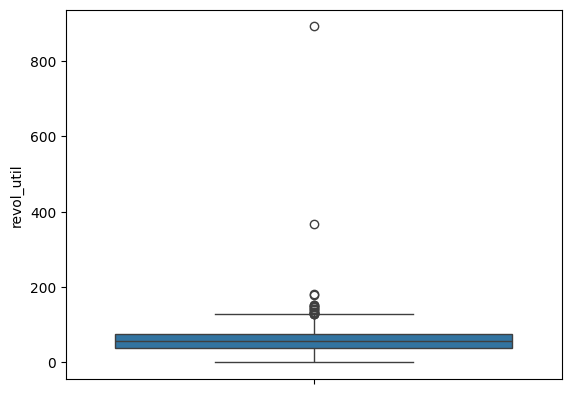

In [34]:
sns.boxplot(df['revol_util'])

Membiarkan outlier tersebut karna masih memiliki makna dan relevan dengan kolom revol_bal

In [35]:
df.loc[df[['revol_util']].idxmax(axis=0), ['revol_bal', 'revol_util']]

,revol_bal,revol_util
406516,2677,892.3


In [36]:
df['collections_12_mths_ex_med'].value_counts()

0.0     462226
1.0       3665
2.0        219
3.0         19
4.0          7
6.0          1
16.0         1
20.0         1
5.0          1
Name: collections_12_mths_ex_med, dtype: int64

Mengisi missing value pada kolom collections_12_mths_ex_med dengan nilai 0

In [37]:
df['collections_12_mths_ex_med'] = df['collections_12_mths_ex_med'].fillna(0)

In [38]:
df.isna().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
purpose                           0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                        0
total_acc                         0
initial_list_status               0
out_prncp                         0
out_prncp_inv                     0
collections_12_mths_ex_med        0
acc_now_delinq                    0
tot_coll_amt                  70247
tot_cur_bal                 

Cek korelasi dari kolom tot_coll_amt, tot_cur_bal, total_rev_hi_lim dengan kolom loan_category

In [39]:
df[['tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'loan_category']].corr()

,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_category
tot_coll_amt,1.000000,0.000740,-0.003224,0.001178
tot_cur_bal,0.000740,1.000000,0.356388,0.050865
total_rev_hi_lim,-0.003224,0.356388,1.000000,0.037735
loan_category,0.001178,0.050865,0.037735,1.000000


Cek missing value dari kolom tot_coll_amt

In [40]:
df.loc[df['tot_coll_amt'].isna()]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_category
0,5000,5000,4975.0,36,10.65,162.87,B,10.0,RENT,24000.0,Verified,credit_card,27.65,0.0,Jan-85,1.0,3.0,0.0,13648,83.7,9.0,f,0.00,0.00,0.0,0.0,NaN,NaN,NaN,1
1,2500,2500,2500.0,60,15.27,59.83,C,0.5,RENT,30000.0,Source Verified,car,1.00,0.0,Apr-99,5.0,3.0,0.0,1687,9.4,4.0,f,0.00,0.00,0.0,0.0,NaN,NaN,NaN,0
2,2400,2400,2400.0,36,15.96,84.33,C,10.0,RENT,12252.0,Not Verified,small_business,8.72,0.0,Nov-01,2.0,2.0,0.0,2956,98.5,10.0,f,0.00,0.00,0.0,0.0,NaN,NaN,NaN,1
3,10000,10000,10000.0,36,13.49,339.31,C,10.0,RENT,49200.0,Source Verified,other,20.00,0.0,Feb-96,1.0,10.0,0.0,5598,21.0,37.0,f,0.00,0.00,0.0,0.0,NaN,NaN,NaN,1
4,3000,3000,3000.0,60,12.69,67.79,B,1.0,RENT,80000.0,Source Verified,other,17.94,0.0,Jan-96,0.0,15.0,0.0,27783,53.9,38.0,f,766.90,766.90,0.0,0.0,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230652,20500,20500,20500.0,36,16.77,728.54,D,7.0,RENT,60000.0,Source Verified,debt_consolidation,16.40,1.0,Oct-88,3.0,10.0,0.0,15417,58.4,20.0,f,0.00,0.00,0.0,0.0,NaN,NaN,NaN,1
230653,15000,15000,15000.0,36,15.27,521.97,C,3.0,RENT,57600.0,Source Verified,small_business,8.35,2.0,Jan-04,1.0,18.0,0.0,8897,33.1,30.0,f,0.00,0.00,0.0,0.0,NaN,NaN,NaN,1
230654,35000,35000,35000.0,36,15.96,1229.81,C,3.0,MORTGAGE,160000.0,Source Verified,small_business,4.90,0.0,Sep-00,1.0,9.0,0.0,23665,62.4,17.0,f,0.00,0.00,0.0,0.0,NaN,NaN,NaN,1
230655,12000,12000,12000.0,36,16.29,423.61,D,0.0,MORTGAGE,35000.0,Source Verified,other,12.93,0.0,Aug-01,0.0,14.0,0.0,15006,93.2,27.0,f,0.00,0.00,0.0,0.0,NaN,NaN,NaN,0


In [41]:
df['tot_coll_amt'].value_counts()

0.0        346259
50.0          837
100.0         650
75.0          515
60.0          309
            ...  
13779.0         1
15036.0         1
15986.0         1
2477.0          1
6532.0          1
Name: tot_coll_amt, Length: 6321, dtype: int64

In [42]:
df['tot_cur_bal'].value_counts()

0.0         78
14186.0     15
23254.0     15
28674.0     14
30491.0     14
            ..
179524.0     1
217367.0     1
111276.0     1
260290.0     1
57477.0      1
Name: tot_cur_bal, Length: 220690, dtype: int64

In [43]:
df['total_rev_hi_lim'].value_counts()

15000.0     1392
13500.0     1324
10000.0     1316
12000.0     1301
12500.0     1294
            ... 
29117.0        1
31243.0        1
84434.0        1
89535.0        1
479500.0       1
Name: total_rev_hi_lim, Length: 14612, dtype: int64

Menghapus kolom tot_coll_amt, tot_cur_bal, total_rev_hi_lim karena ada sebanyak 70247 missing value, dan jika dipaksakan diisi oleh nilai 0 atau median, maka akan terdapat imbalance value dari ketiga kolom tersebut dan ditakutkan akan mempengaruhi model training

In [44]:
df.drop(columns=['tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'], inplace=True)

In [45]:
df.isna().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
purpose                       0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
collections_12_mths_ex_med    0
acc_now_delinq                0
loan_category                 0
dtype: int64

Mengubah tipe data earliest_cr_line menjadi datetime

In [46]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y').dt.year

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466256 entries, 0 to 466284
Data columns (total 27 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466256 non-null  int64  
 1   funded_amnt                 466256 non-null  int64  
 2   funded_amnt_inv             466256 non-null  float64
 3   term                        466256 non-null  int64  
 4   int_rate                    466256 non-null  float64
 5   installment                 466256 non-null  float64
 6   grade                       466256 non-null  object 
 7   emp_length                  466256 non-null  float64
 8   home_ownership              466256 non-null  object 
 9   annual_inc                  466256 non-null  float64
 10  verification_status         466256 non-null  object 
 11  purpose                     466256 non-null  object 
 12  dti                         466256 non-null  float64
 13  delinq_2yrs   

Missing value sudah selesai dihandle, dan dataset sudah bersih dari missing value, saatnya lanjut ke proses berikutnya

## Exploratory Data Analysis

Membuat beberapa variabel untuk membedakan kolom numerik, kategorik dan label

In [48]:
numerical_cols = ['loan_amnt', 'term',	'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs',	'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'collections_12_mths_ex_med', 'acc_now_delinq']
categorical_cols = ['grade', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status']
label = 'loan_category'

Plotting untuk melihat jumlah value dari loan_category

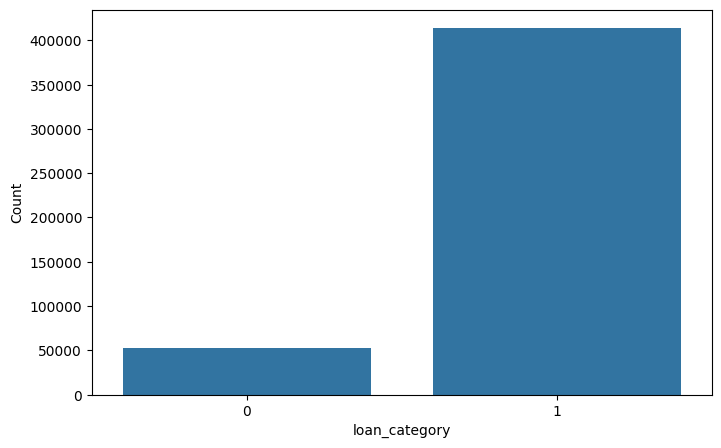

In [49]:
plt.figure(figsize=(8, 5))
sns.countplot(x=label, data=df)
plt.xlabel(label)
plt.ylabel('Count')
plt.show()

Melihat histogram dari semua kolom

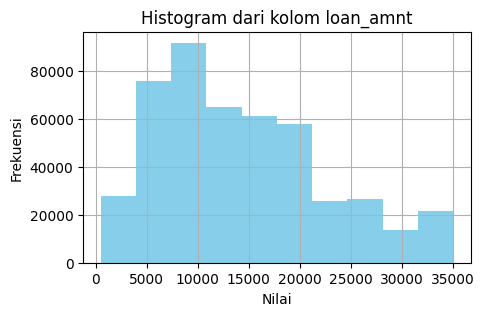

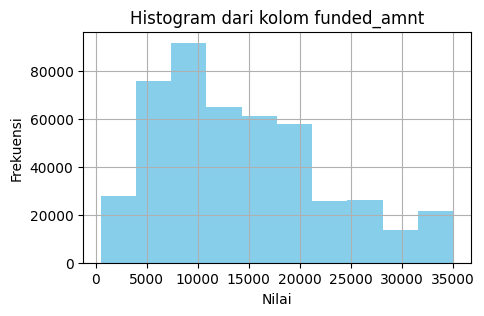

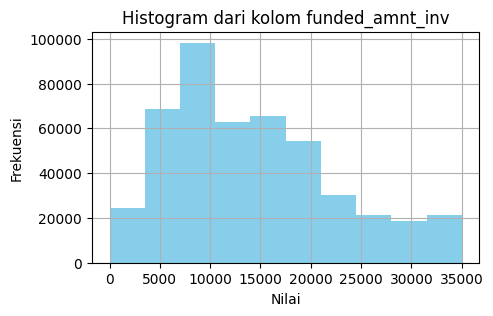

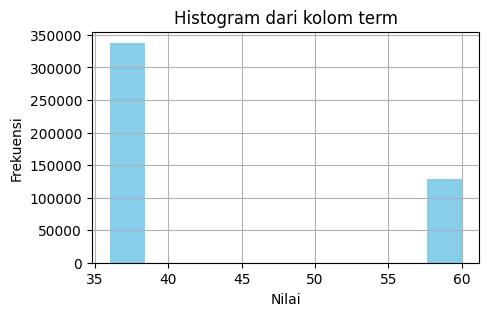

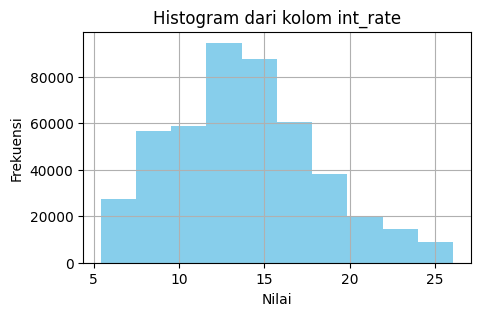

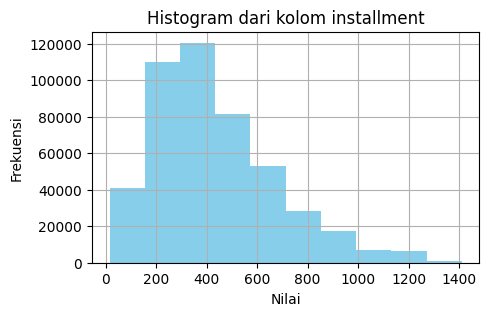

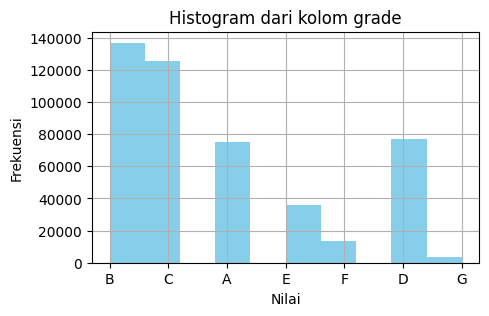

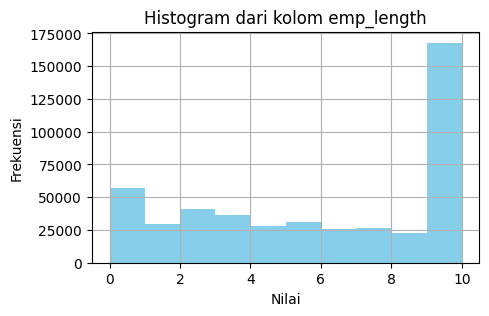

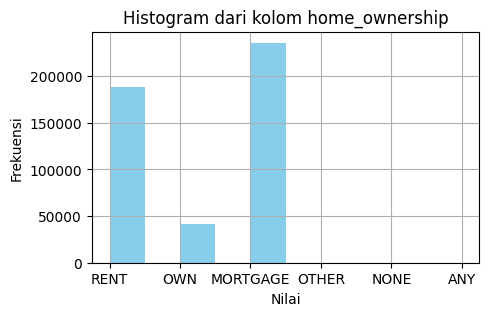

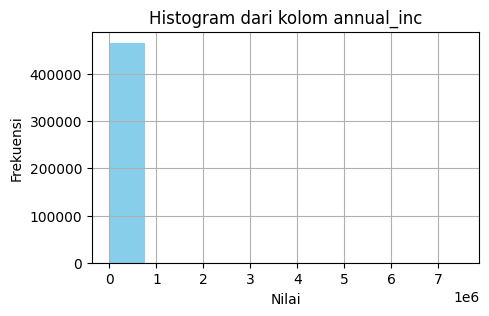

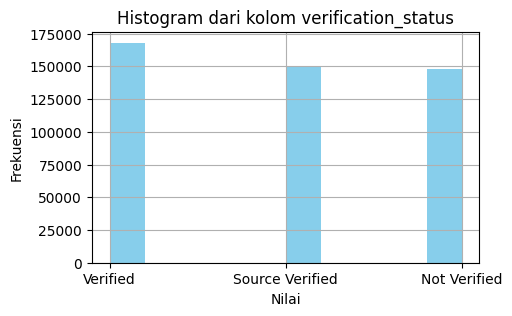

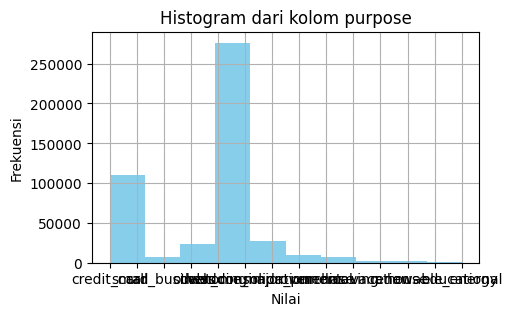

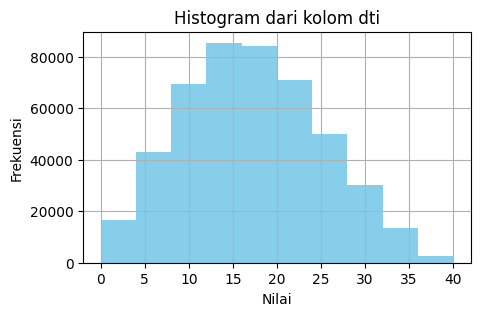

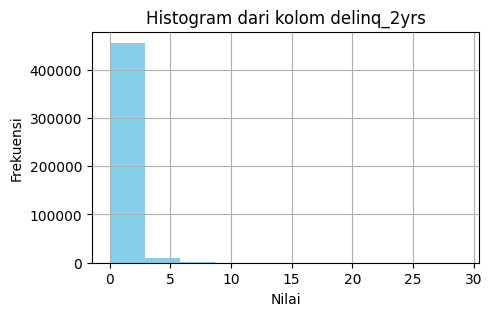

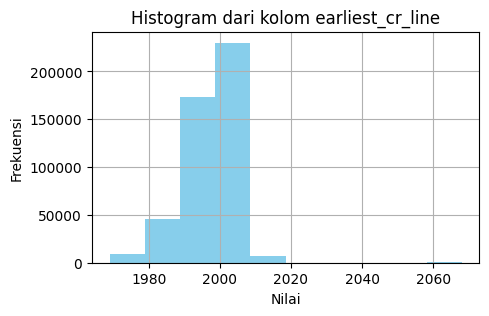

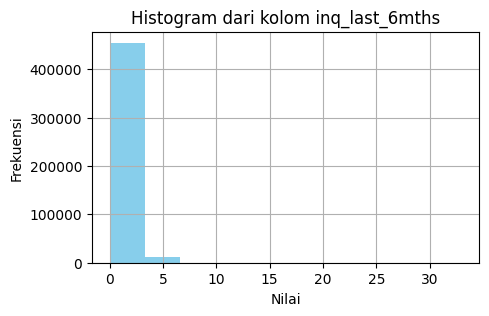

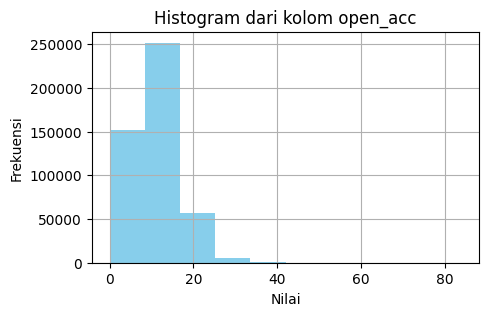

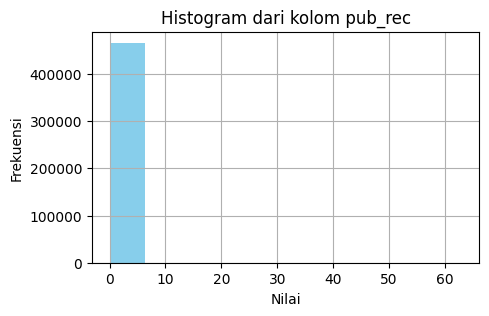

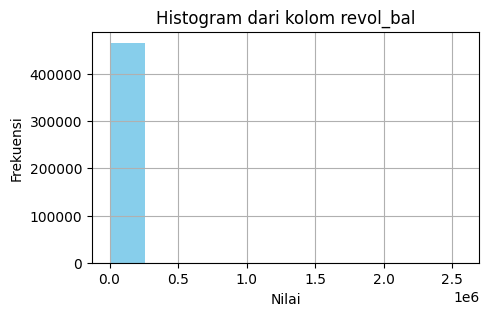

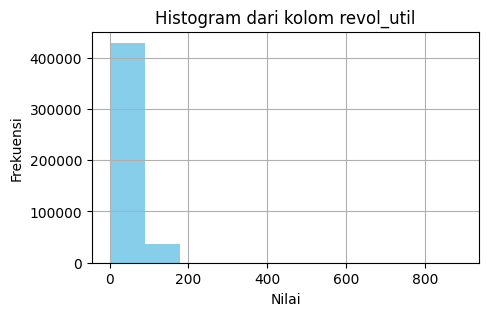

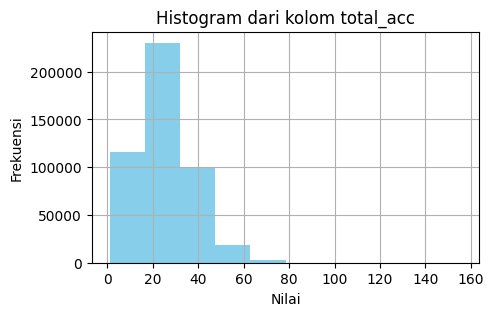

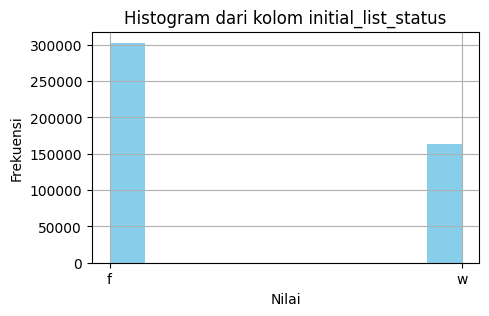

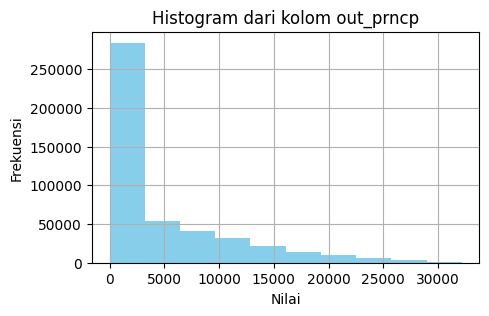

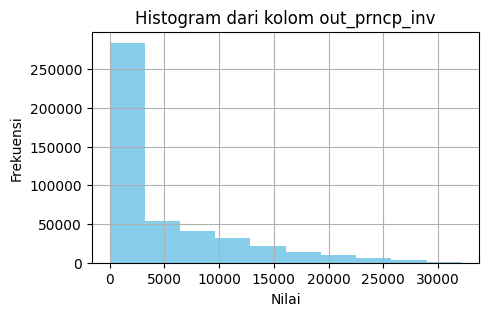

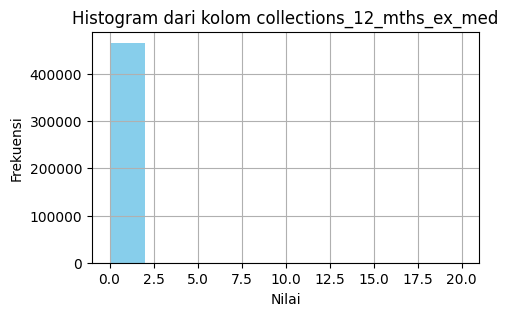

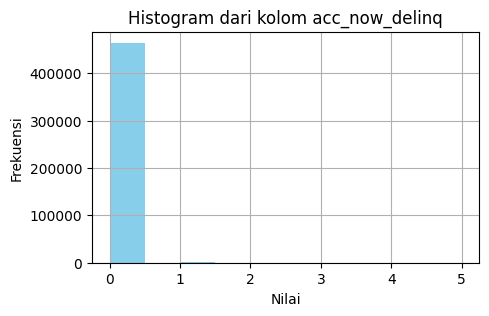

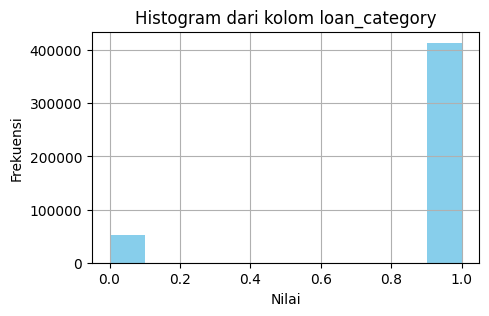

In [50]:
for i, col in enumerate(df.columns):
  plt.figure(figsize=(5, 3))
  plt.hist(df[col], bins=10, color='skyblue')
  plt.xlabel('Nilai')
  plt.ylabel('Frekuensi')
  plt.title(f'Histogram dari kolom {col}')
  plt.grid(True)
  plt.show()

Menghapus kolom funded_amnt, funded_amnt_inv,
out_prncp_inv karena memiliki kemiripan dengan kolom yang lain

In [51]:
df.drop(columns=['funded_amnt','funded_amnt_inv', 'out_prncp_inv'], inplace=True)

Plotting untuk kolom kategorik

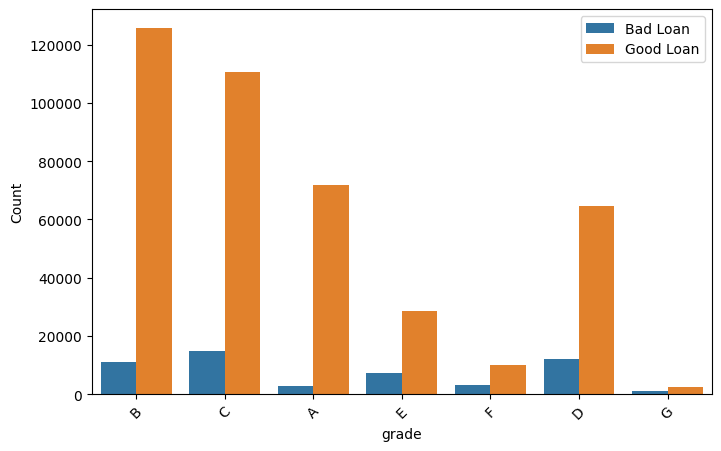

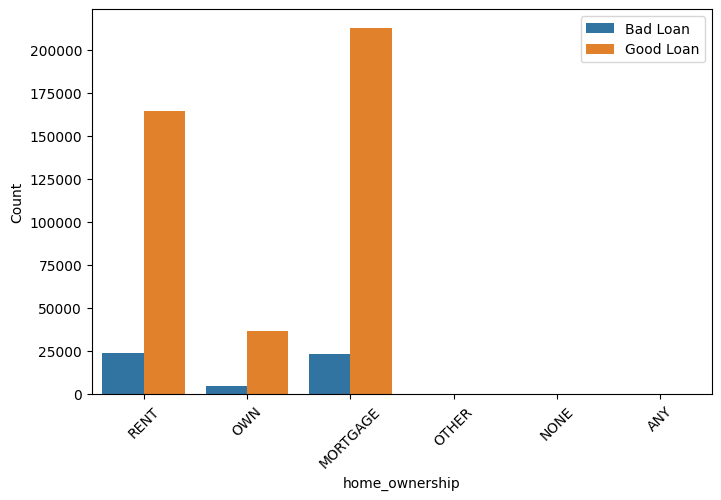

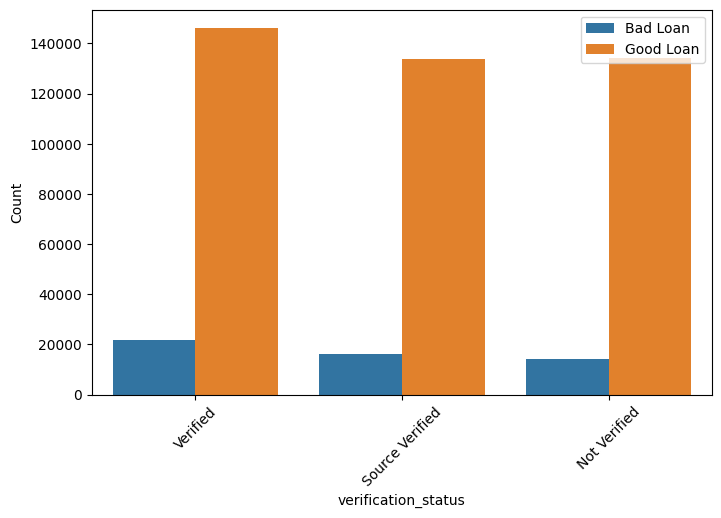

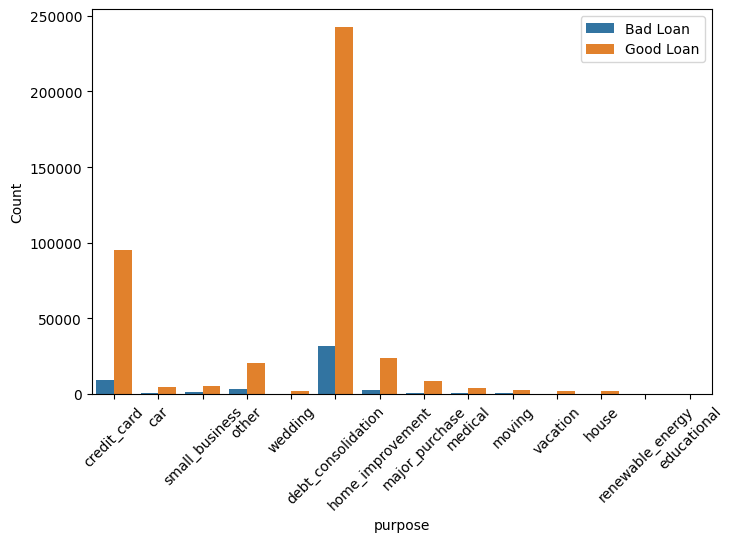

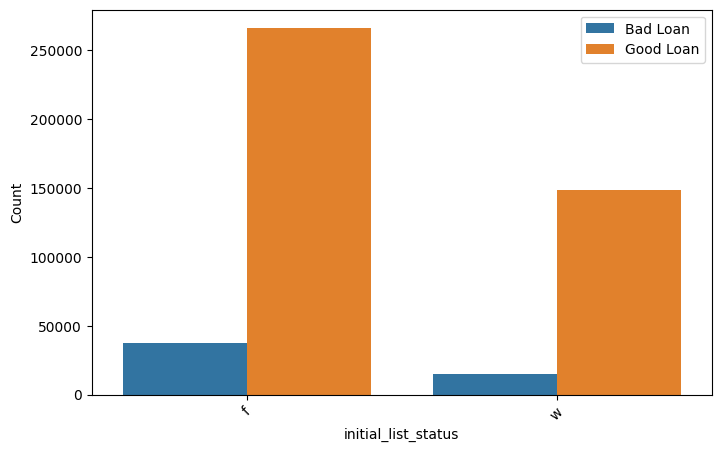

In [52]:
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, hue=label, data=df)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(labels=['Bad Loan', 'Good Loan'])
    plt.show()

Plotting untuk kolom numerik

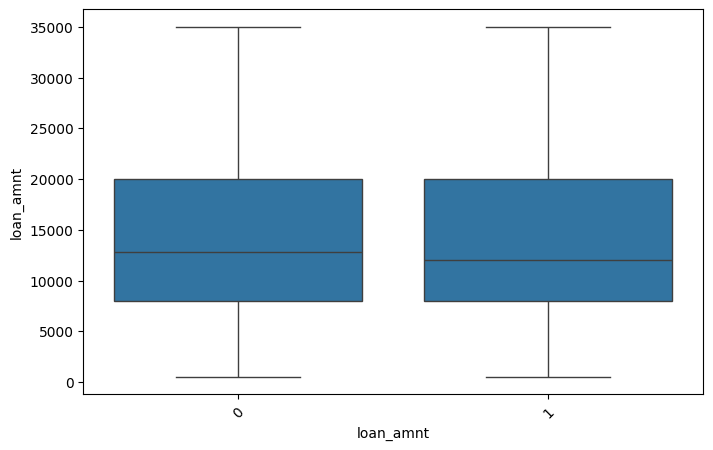

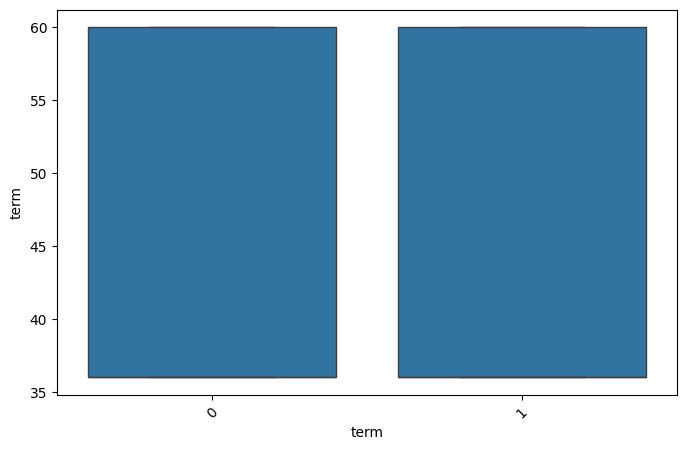

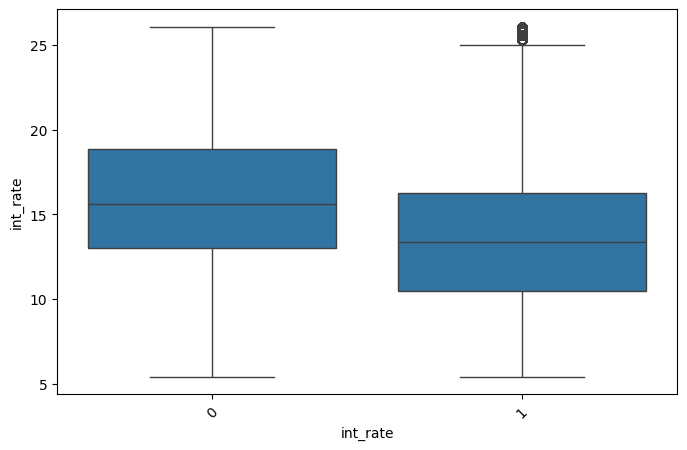

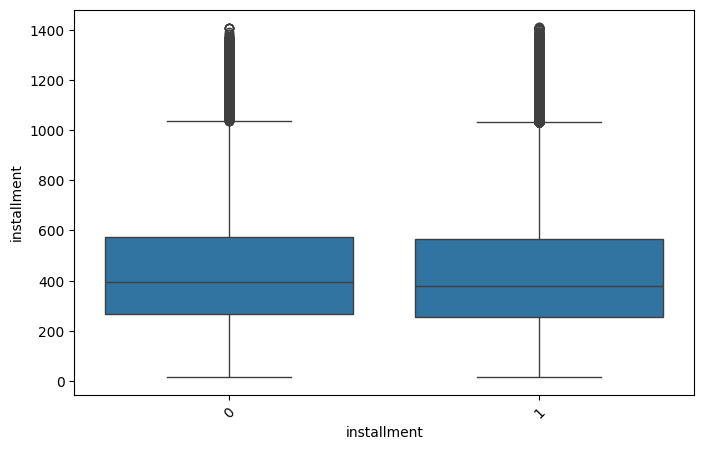

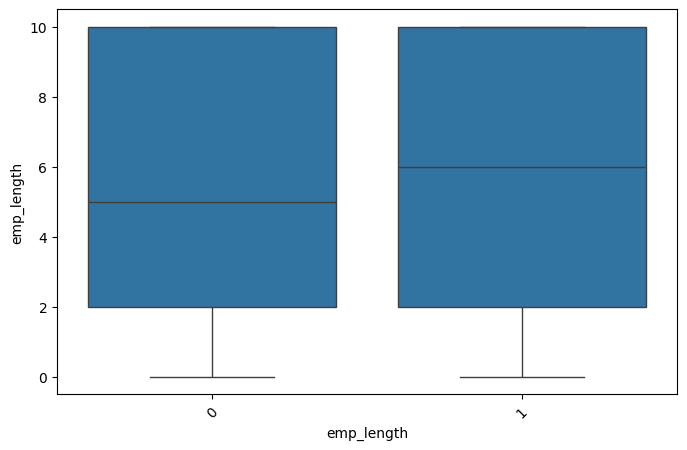

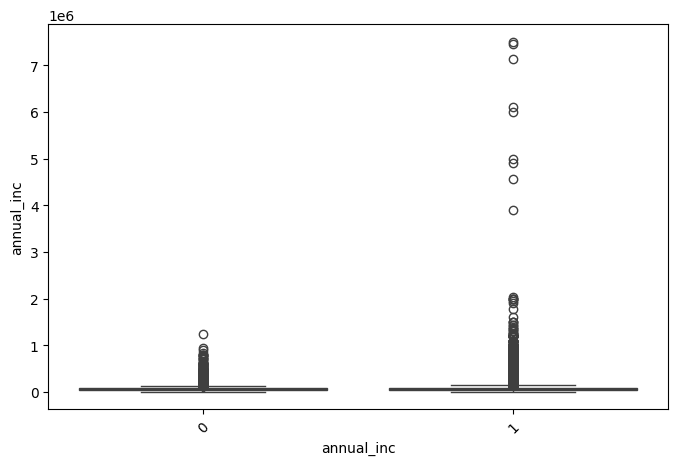

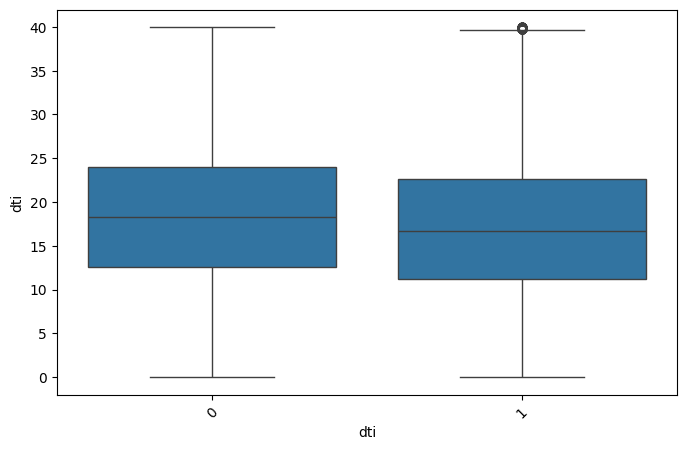

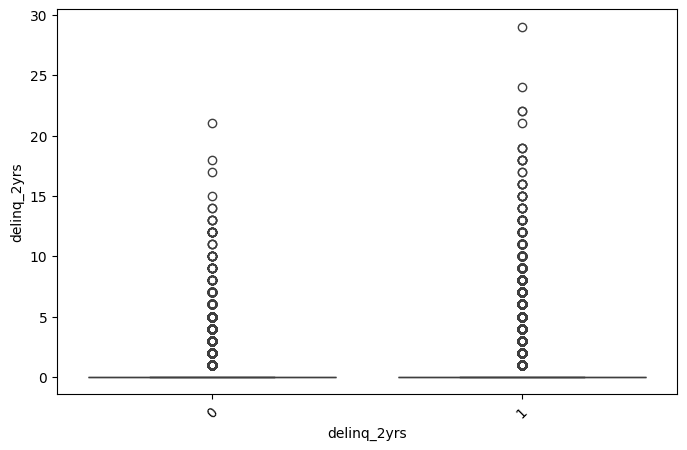

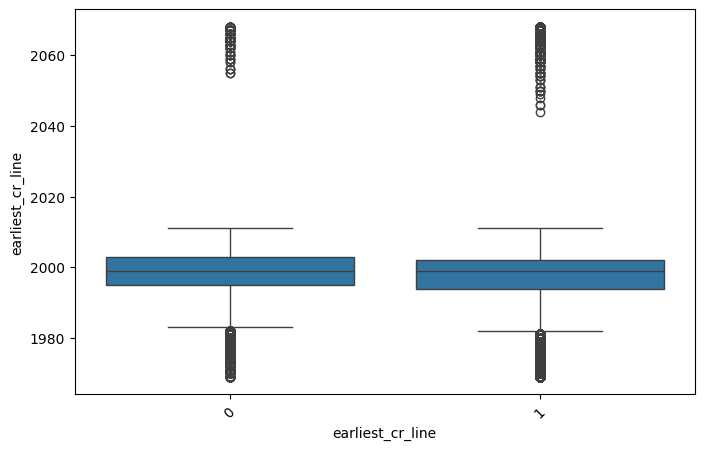

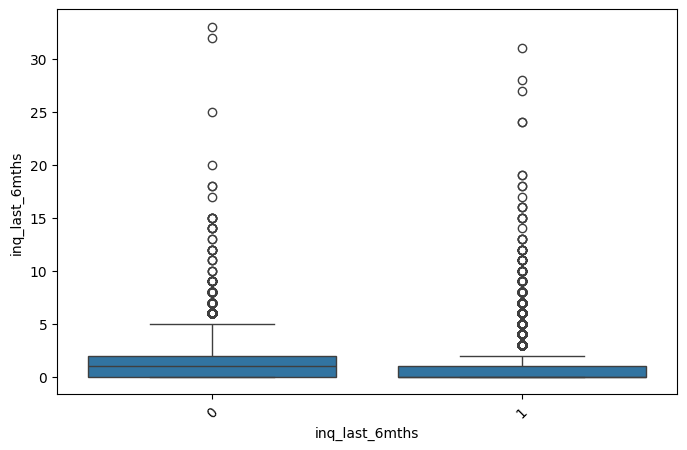

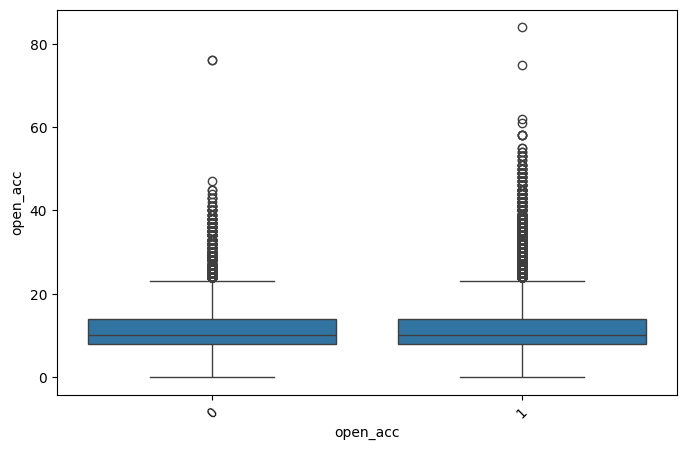

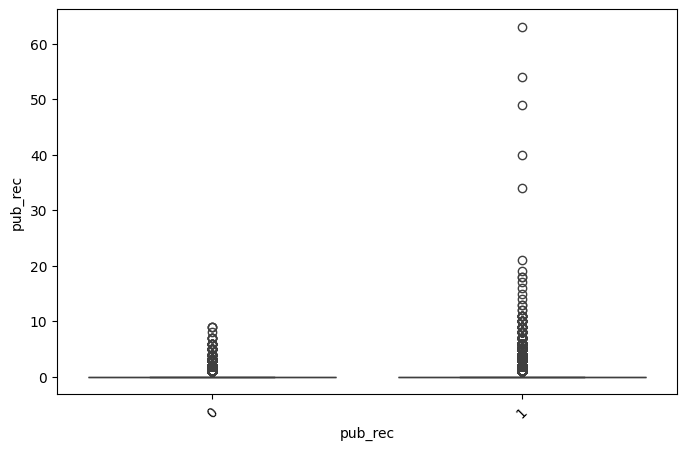

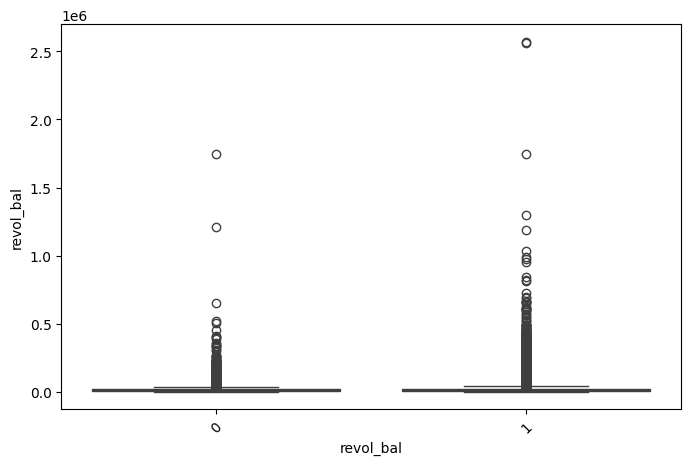

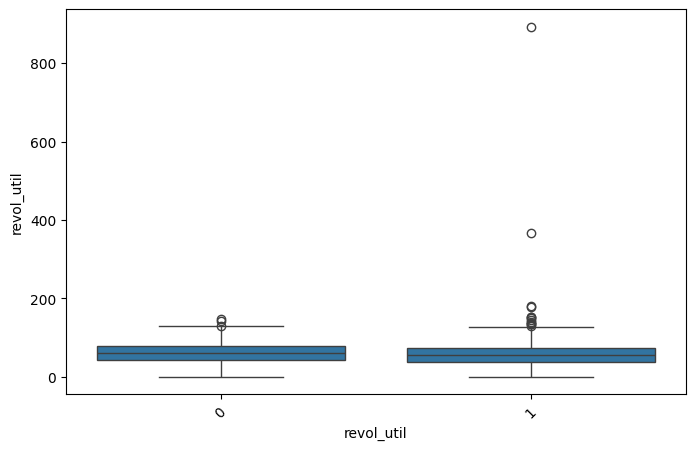

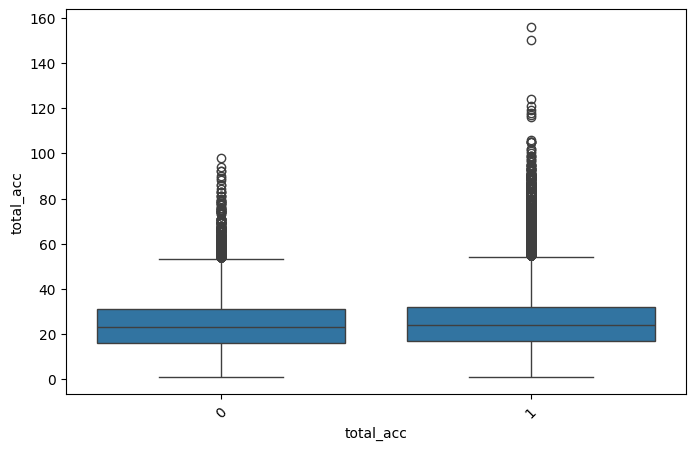

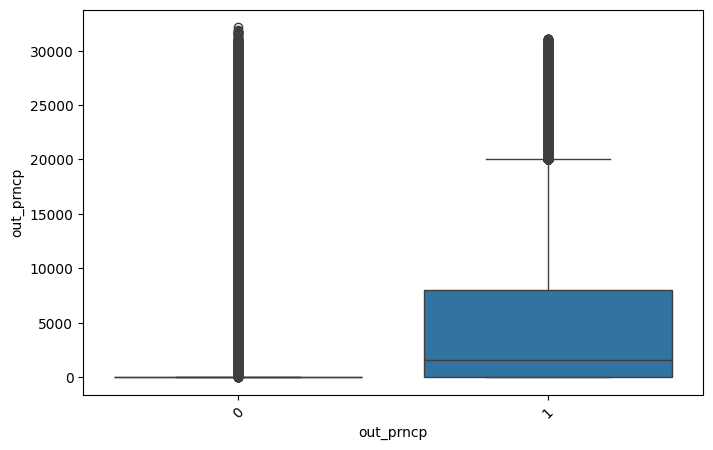

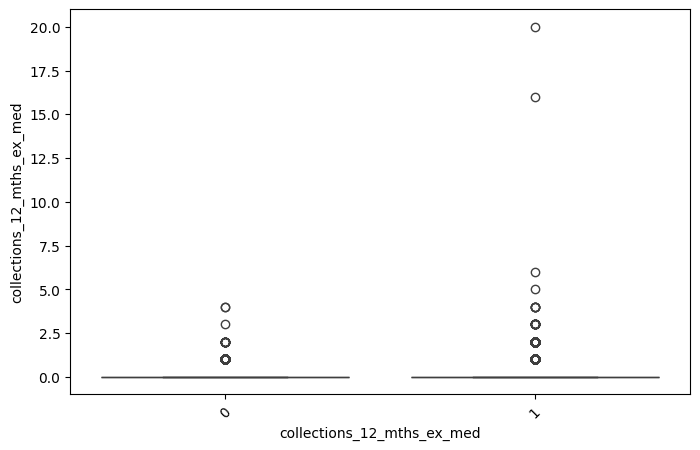

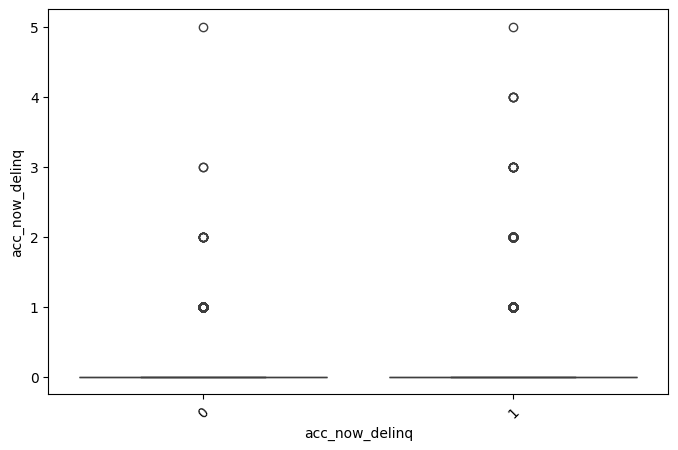

In [53]:
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[label], y=df[col])
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.show()

Cek matriks korelasi dari kolom numerik

<ipython-input-54-1bf5b29d8a76>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


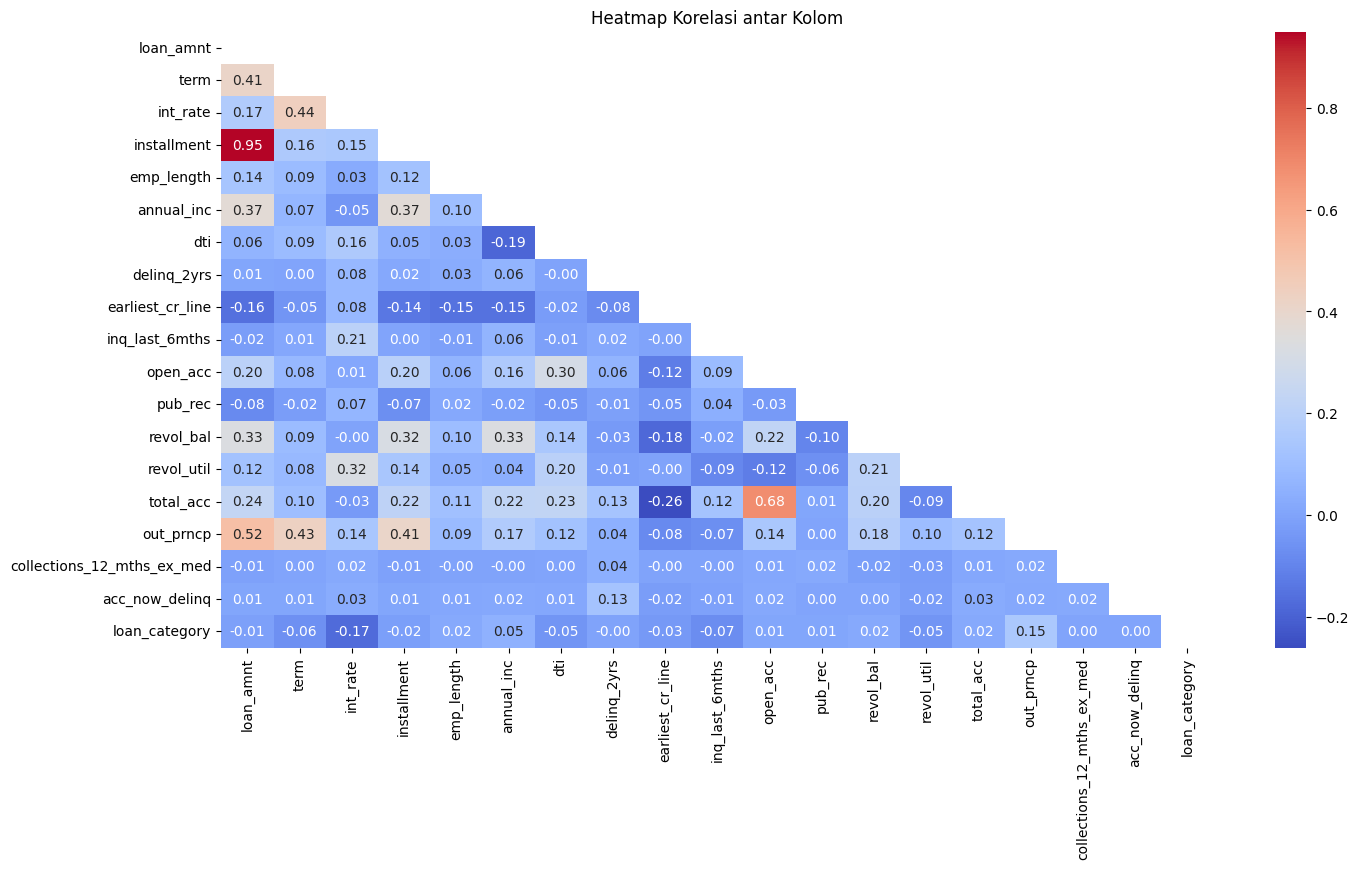

In [54]:
correlation = df.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))

fig = plt.figure(figsize=(16,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', mask=mask)
plt.title("Heatmap Korelasi antar Kolom")
plt.show()

Cek kolom yang memiliki value > 1000

In [55]:
numeric_cols = df.select_dtypes(include=['int', 'float']).columns

result = df[numeric_cols][df[numeric_cols] > 1000]

print(result)

        loan_amnt  term  int_rate  installment  emp_length  annual_inc  dti  \
0          5000.0   NaN       NaN          NaN         NaN     24000.0  NaN   
1          2500.0   NaN       NaN          NaN         NaN     30000.0  NaN   
2          2400.0   NaN       NaN          NaN         NaN     12252.0  NaN   
3         10000.0   NaN       NaN          NaN         NaN     49200.0  NaN   
4          3000.0   NaN       NaN          NaN         NaN     80000.0  NaN   
...           ...   ...       ...          ...         ...         ...  ...   
466280    18400.0   NaN       NaN          NaN         NaN    110000.0  NaN   
466281    22000.0   NaN       NaN          NaN         NaN     78000.0  NaN   
466282    20700.0   NaN       NaN          NaN         NaN     46000.0  NaN   
466283     2000.0   NaN       NaN          NaN         NaN     83000.0  NaN   
466284    10000.0   NaN       NaN          NaN         NaN     46000.0  NaN   

        delinq_2yrs  earliest_cr_line  inq_last_6mt

In [56]:
del numeric_cols, result

Melakukan normalisasi pada kolom yang valuenya melebihi 1000, tujuannya agar model dapat memproses data yang telah dinormalisasi dengan lebih baik

In [57]:
from sklearn.preprocessing import MinMaxScaler

normalized_cols = ['loan_amnt', 'annual_inc', 'revol_bal', 'out_prncp']
keep_cols = ['term', 'int_rate', 'installment', 'grade', 'emp_length',
       'home_ownership', 'verification_status', 'purpose', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_util', 'total_acc',
       'initial_list_status', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'loan_category']

scaler = MinMaxScaler()

df_normalized = df.copy()
df_normalized[normalized_cols] = scaler.fit_transform(df_normalized[normalized_cols])
df = pd.concat([df_normalized[normalized_cols], df[keep_cols]], axis=1)

print(df)

        loan_amnt  annual_inc  revol_bal  out_prncp  term  int_rate  \
0        0.130435    0.002948   0.005313   0.000000    36     10.65   
1        0.057971    0.003748   0.000657   0.000000    60     15.27   
2        0.055072    0.001381   0.001151   0.000000    36     15.96   
3        0.275362    0.006309   0.002179   0.000000    36     13.49   
4        0.072464    0.010416   0.010815   0.023846    60     12.69   
...           ...         ...        ...        ...   ...       ...   
466280   0.518841    0.014418   0.009034   0.390978    60     14.47   
466281   0.623188    0.010150   0.007099   0.000000    60     19.97   
466282   0.585507    0.005882   0.002603   0.448636    60     16.99   
466283   0.043478    0.010817   0.004439   0.000000    36      7.90   
466284   0.275362    0.005882   0.004408   0.123891    36     19.20   

        installment grade  emp_length home_ownership verification_status  \
0            162.87     B        10.0           RENT            Verifie

Melakukan one hot encoding terhadap kolom kategorik

In [58]:
one_hot_encoded = pd.get_dummies(df[categorical_cols])

df_final = pd.concat([df, one_hot_encoded], axis=1)

In [59]:
df_final = df_final.drop(columns=categorical_cols)

## Modelling

In [60]:
x = df_final.drop(columns=['loan_category'])
y = df_final[label]

Melakukan oversampling menggunakan metode SMOTE, untuk menghindari overfitting terhadap kelas mayoritas dan tidak mampu menggeneralisasi pada kelas minoritas

In [61]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(x, y)

Plotting untuk melihat jumlah value dari loan_category setelah oversampling

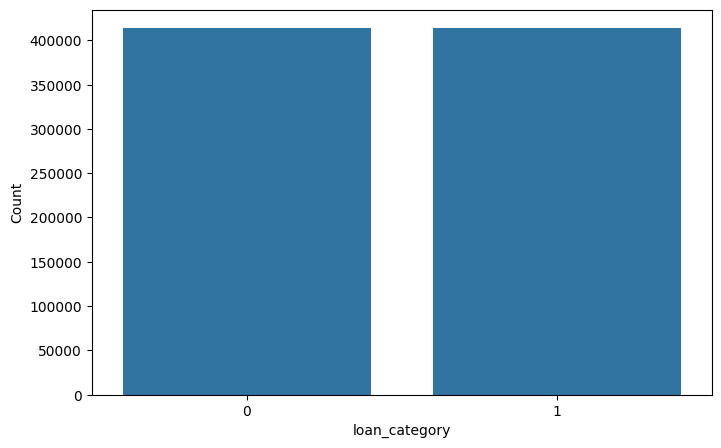

In [62]:
plt.figure(figsize=(8, 5))
sns.countplot(x=y_resampled, data=X_resampled)
plt.xlabel(label)
plt.ylabel('Count')
plt.show()

Split dataset menjadi dataset training dan testing

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.05, random_state=42)

Konversi tipe data menjadi numpy array agar data bisa diterima oleh model deep learning

In [64]:
def convert_data(data, label):
  data = np.asarray(data.values).astype(np.float32)
  label = np.asarray(label.values).astype(np.float32)

  return data, label

In [65]:
train_data, train_label = convert_data(X_train, y_train)

Membuat arsitektur model deep learning sederhana menggunakan tensorflow

In [66]:
num_features = len(X_train.columns)

def create_model():
  model = tf.keras.Sequential([
          tf.keras.layers.Dense(128, input_shape=(num_features,),  activation='relu'),
          tf.keras.layers.Dense(64, activation='relu'),
          tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

  return model

Melihat ringkasan arsitektur model yang telah didefine

In [67]:
model = create_model()

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               6528      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 14849 (58.00 KB)
Trainable params: 14849 (58.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Melakukan proses training

In [68]:
history = model.fit(x=train_data,
          y=train_label,
          epochs=30,
          verbose=2,
          batch_size=128,
          validation_split=0.05,
          shuffle=True)

Epoch 1/30
5840/5840 - 17s - loss: 0.6495 - accuracy: 0.7948 - val_loss: 1.2039 - val_accuracy: 0.5507 - 17s/epoch - 3ms/step
Epoch 2/30
5840/5840 - 15s - loss: 0.3797 - accuracy: 0.8735 - val_loss: 0.2286 - val_accuracy: 0.9035 - 15s/epoch - 3ms/step
Epoch 3/30
5840/5840 - 15s - loss: 0.2914 - accuracy: 0.8933 - val_loss: 1.0309 - val_accuracy: 0.7681 - 15s/epoch - 3ms/step
Epoch 4/30
5840/5840 - 15s - loss: 0.2523 - accuracy: 0.9065 - val_loss: 0.2954 - val_accuracy: 0.9098 - 15s/epoch - 3ms/step
Epoch 5/30
5840/5840 - 15s - loss: 0.2340 - accuracy: 0.9132 - val_loss: 0.2022 - val_accuracy: 0.9257 - 15s/epoch - 3ms/step
Epoch 6/30
5840/5840 - 15s - loss: 0.2275 - accuracy: 0.9164 - val_loss: 0.2176 - val_accuracy: 0.9236 - 15s/epoch - 3ms/step
Epoch 7/30
5840/5840 - 15s - loss: 0.2202 - accuracy: 0.9190 - val_loss: 0.2458 - val_accuracy: 0.8896 - 15s/epoch - 3ms/step
Epoch 8/30
5840/5840 - 16s - loss: 0.2182 - accuracy: 0.9199 - val_loss: 0.2016 - val_accuracy: 0.9244 - 16s/epoch - 3

## Evaluation

In [69]:
def create_plot(history, string):
  plt.plot(history.history[string], 'r', label='Training '+string)
  plt.plot(history.history['val_'+string], 'b', label='Validation '+string)
  plt.title('Training and validation '+string)
  plt.legend()
  plt.show()
  print('')

Plotting loss, val_loss dan acc, val_acc

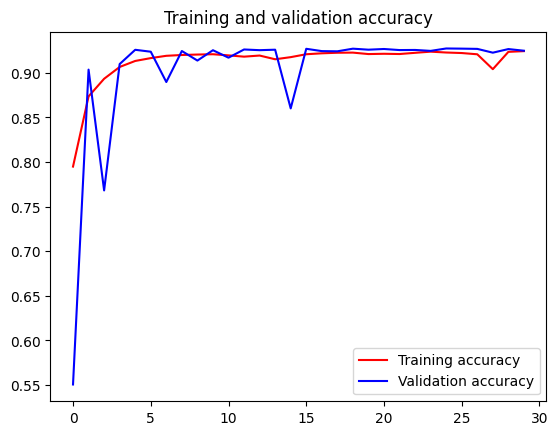

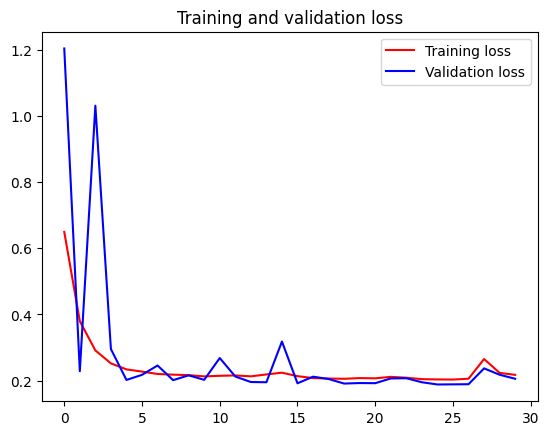

In [70]:
create_plot(history, 'accuracy')
create_plot(history, 'loss')

Evaluasi dengan data testing

In [71]:
loss, accuracy = model.evaluate(X_test, y_test)

print(f'\nLoss: {loss}')
print(f'Accuracy: {accuracy}')

1294/1294 [==============================] - 2s 2ms/step - loss: 0.2092 - accuracy: 0.9229

Loss: 0.20919576287269592
Accuracy: 0.9229375720024109


In [72]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

1294/1294 [==============================] - 2s 2ms/step


Plot confussion matrix berdasarkan prediksi dari data testing dan dibandingkan dengan label yang sebenarnya

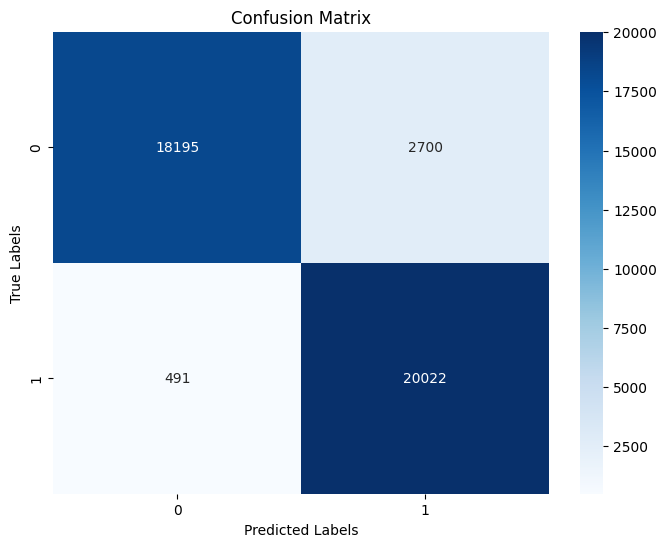

In [73]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Melihat ringkasan dari metrik evaluasi precision, recall, f1-score

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92     20895
           1       0.88      0.98      0.93     20513

    accuracy                           0.92     41408
   macro avg       0.93      0.92      0.92     41408
weighted avg       0.93      0.92      0.92     41408



Menyimpan model

In [76]:
model.save('credit risk model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
